## Unsupervised Analysis of Days of Week

Treating crossings each day as features to learn about the relationships between various days.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
plt.style.use('seaborn')


## Get Data

In [2]:
from jupyterworkflow.data import get_fremont_data
data = get_fremont_data()

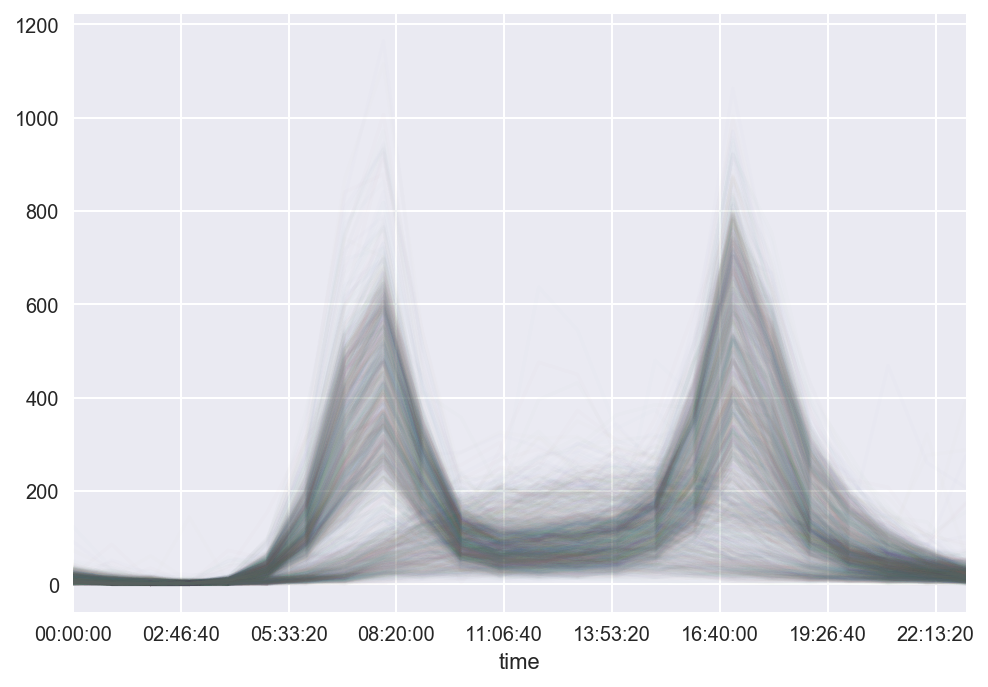

In [3]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.head()
pivoted.plot(legend=False, alpha=0.01)

## Principal Component Analysis

In [4]:
X = pivoted.fillna(0).T.values
X.shape

(1885, 24)

In [5]:
X2 = PCA(2).fit_transform(X)

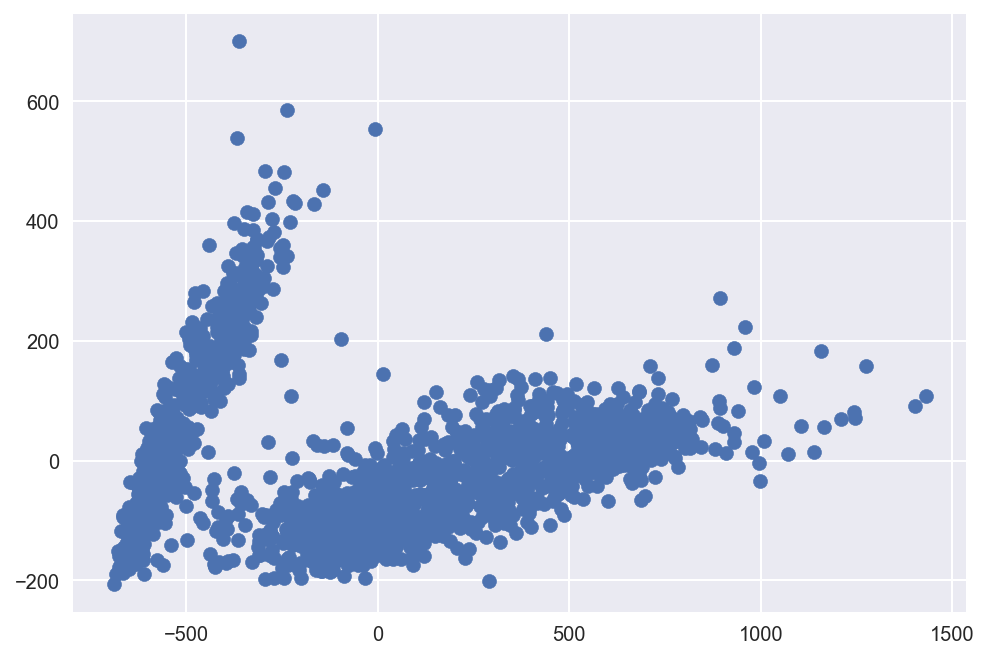

In [6]:
plt.scatter(X2[:, 0], X2[:,1])

## Unsupervised Clustering

In [7]:
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

array([0, 0, 0, ..., 0, 0, 0])

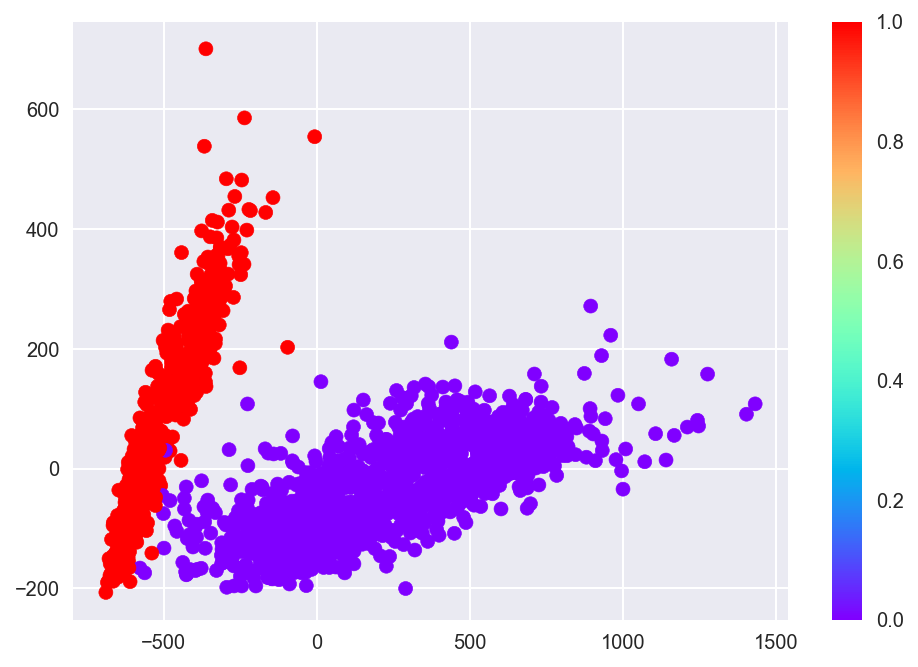

In [8]:
plt.scatter(X2[:,0], X2[:,1], c=labels, cmap='rainbow')
plt.colorbar()

Text(0.5,1,'Purple Cluster')

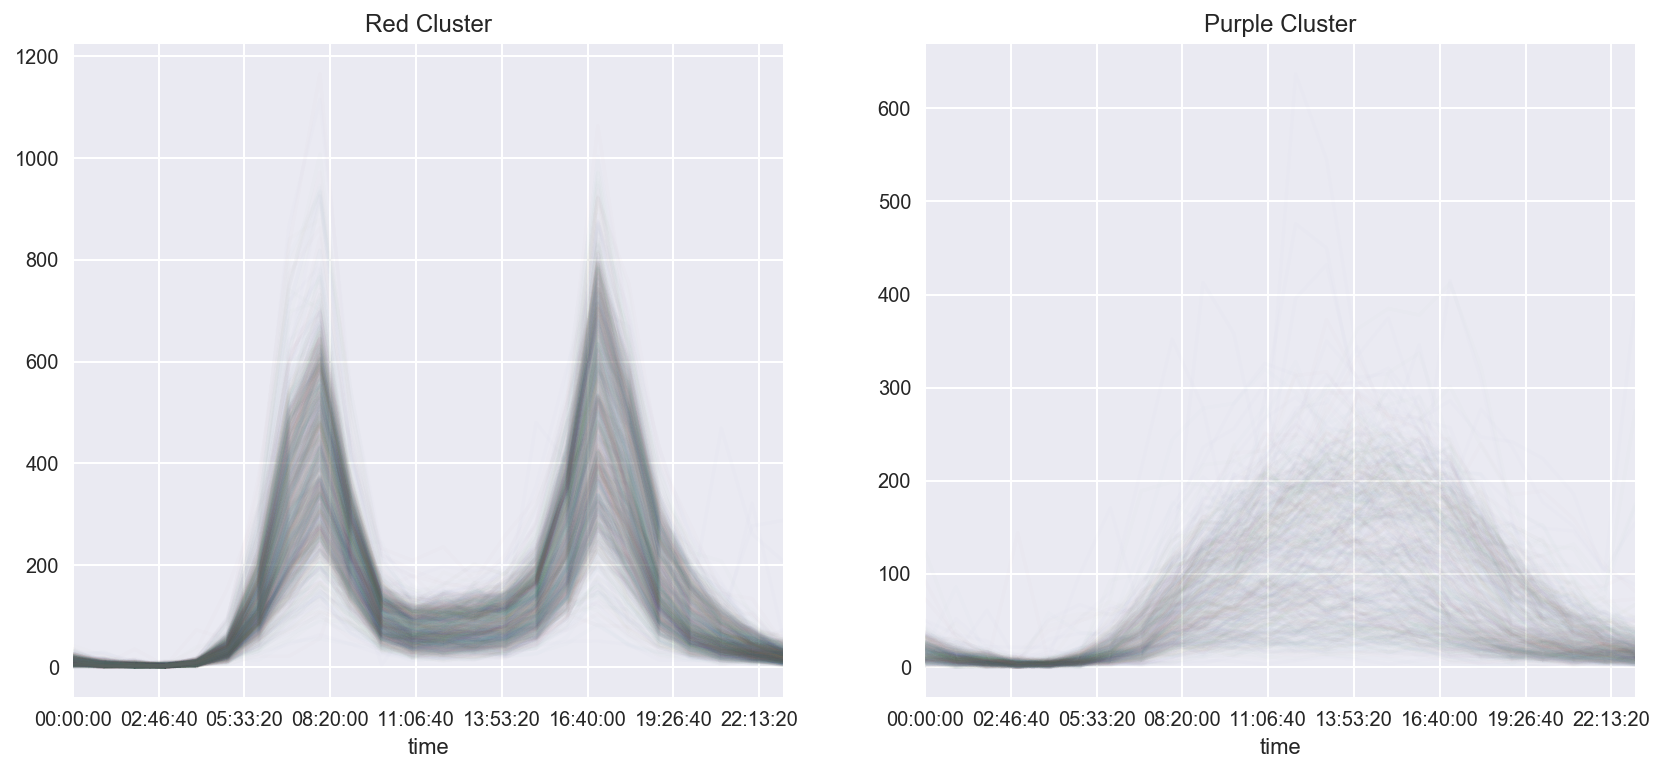

In [9]:
fig, ax = plt.subplots(1,2,figsize=(14,6))

pivoted.T[labels ==0].T.plot(legend=False, alpha=0.01, ax=ax[0])
pivoted.T[labels ==1].T.plot(legend=False, alpha=0.01, ax=ax[1])

ax[0].set_title('Red Cluster')
ax[1].set_title('Purple Cluster')

In [10]:

dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

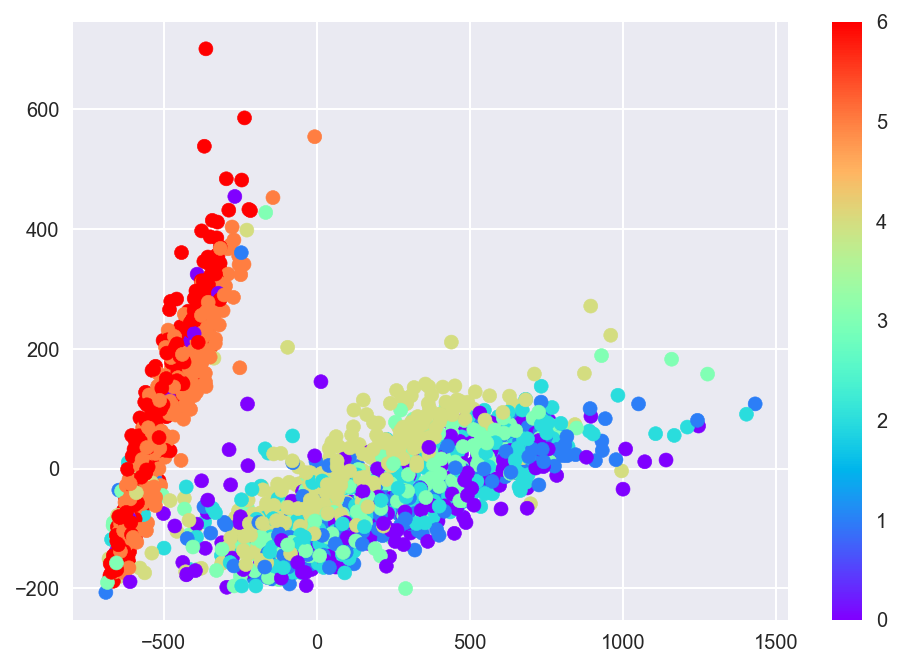

In [11]:
plt.scatter(X2[:,0], X2[:,1], c=dayofweek, cmap='rainbow')
plt.colorbar()

## Analyzing Outliners

The following points are weekdays with a holiday-like pattern

In [12]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels ==0) & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2017-11-15', '2017-11-16', '2017-11-17', '2017-11-20',
               '2017-11-21', '2017-11-22', '2017-11-27', '2017-11-28',
               '2017-11-29', '2017-11-30'],
              dtype='datetime64[ns]', length=1301, freq=None)